In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # ignore the warnings

pd.set_option('display.max_columns',None) # To see all the columns in dataset

## Data Analysis

### Descriptive Analysis 

In [2]:
# Load the dataset
data = pd.read_csv('housing data.csv',na_values=['?'])
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [3]:
# No. of rows and columns in dataset
print('No of rows:',data.shape[0],'\nNo of columns:',data.shape[1])

No of rows: 1418 
No of columns: 13


In [4]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


Inference: The info of the data shows that there are missing values in Electrical, Garage Type, Fence and Misc Features

In [5]:
# Five point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


The summary shows that there is chance of outliers in columns TotalBsmntSF, GrLivArea, GarageArea, SalePrice

In [6]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


In [7]:
# Identify the numeric columns and category columns in the dataset
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cat_cols = ['OverallQual','Electrical','FullBath','GarageType','GarageCars',
           'Fence','MiscFeature']

In [8]:
data.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


<Axes: >

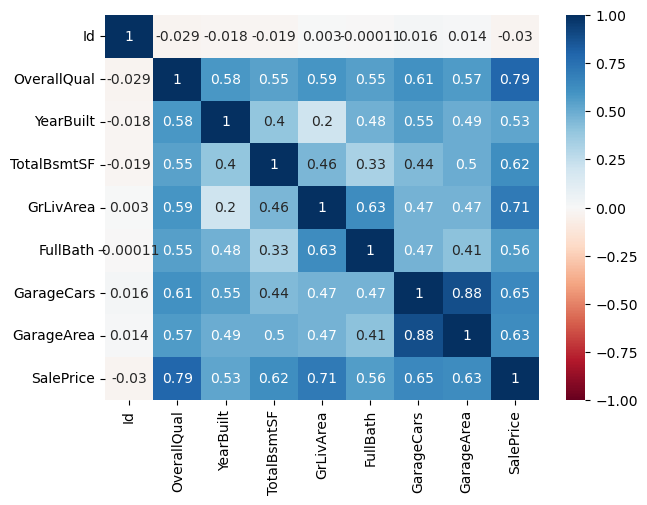

In [10]:
# Correlation plot
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(numeric_only=True),vmax=1,vmin=-1,cmap='RdBu',annot=True)

In [11]:
data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

In [12]:
# Lets remove id as it makes no sense in the data
del data['Id']

In [13]:
data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

### Univariate Analysis on the data

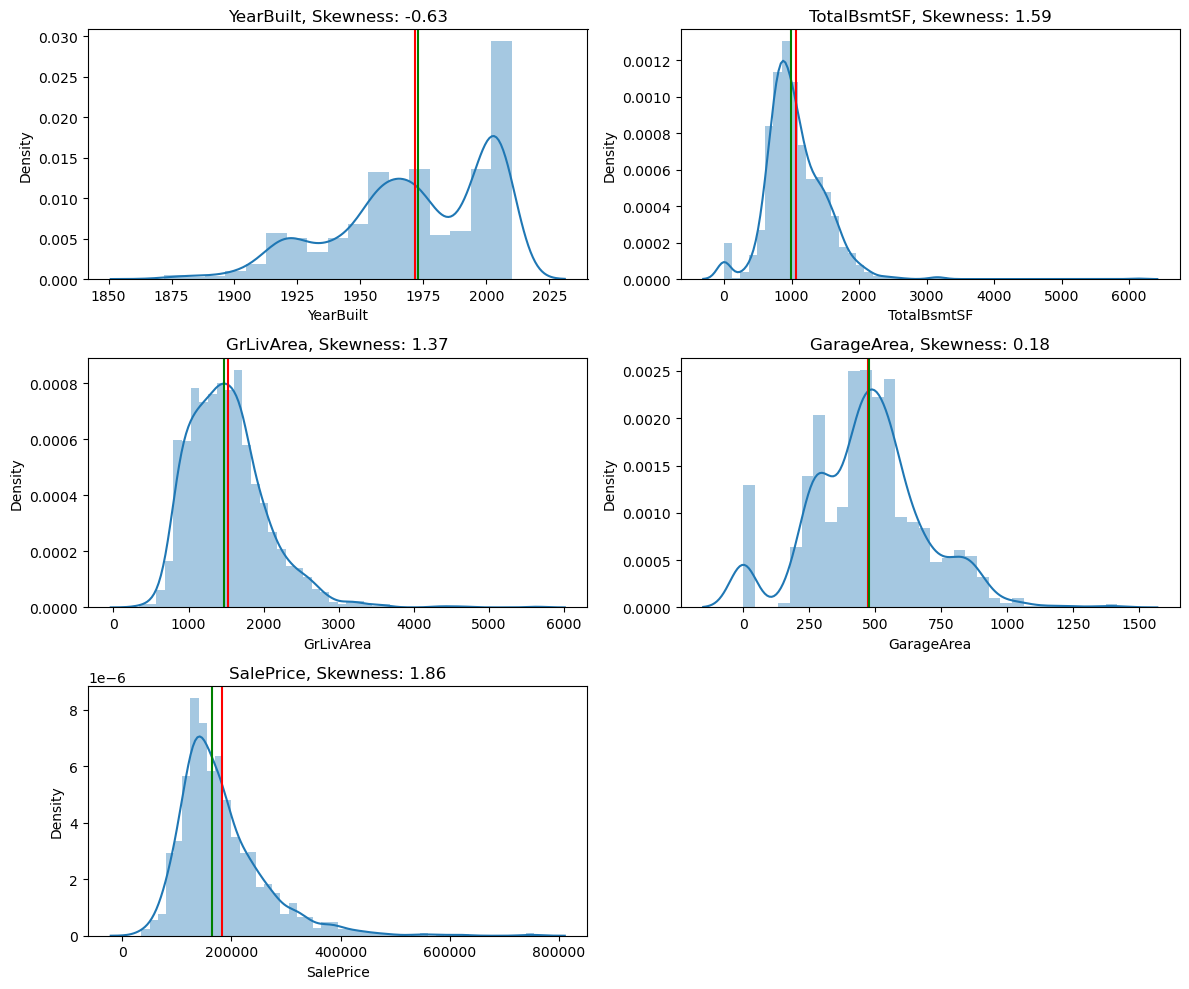

In [14]:
# Number Columns
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='g')
    t+=1
plt.tight_layout()
plt.show()

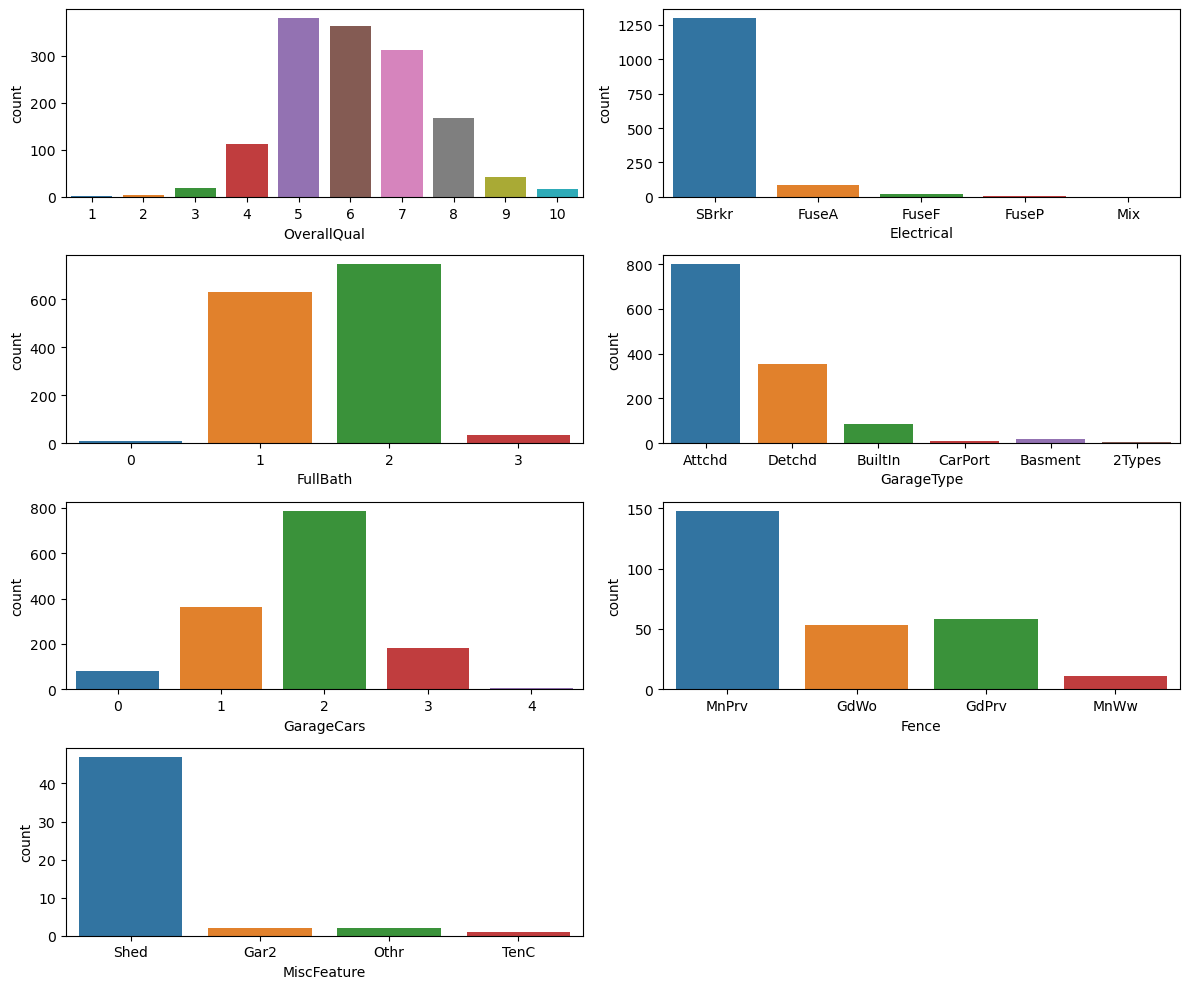

In [15]:
# Category columns
plt.figure(figsize=(12,10))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data = data,x=i)
    t+=1
plt.tight_layout()
plt.show()

### Bivaraite Analysis

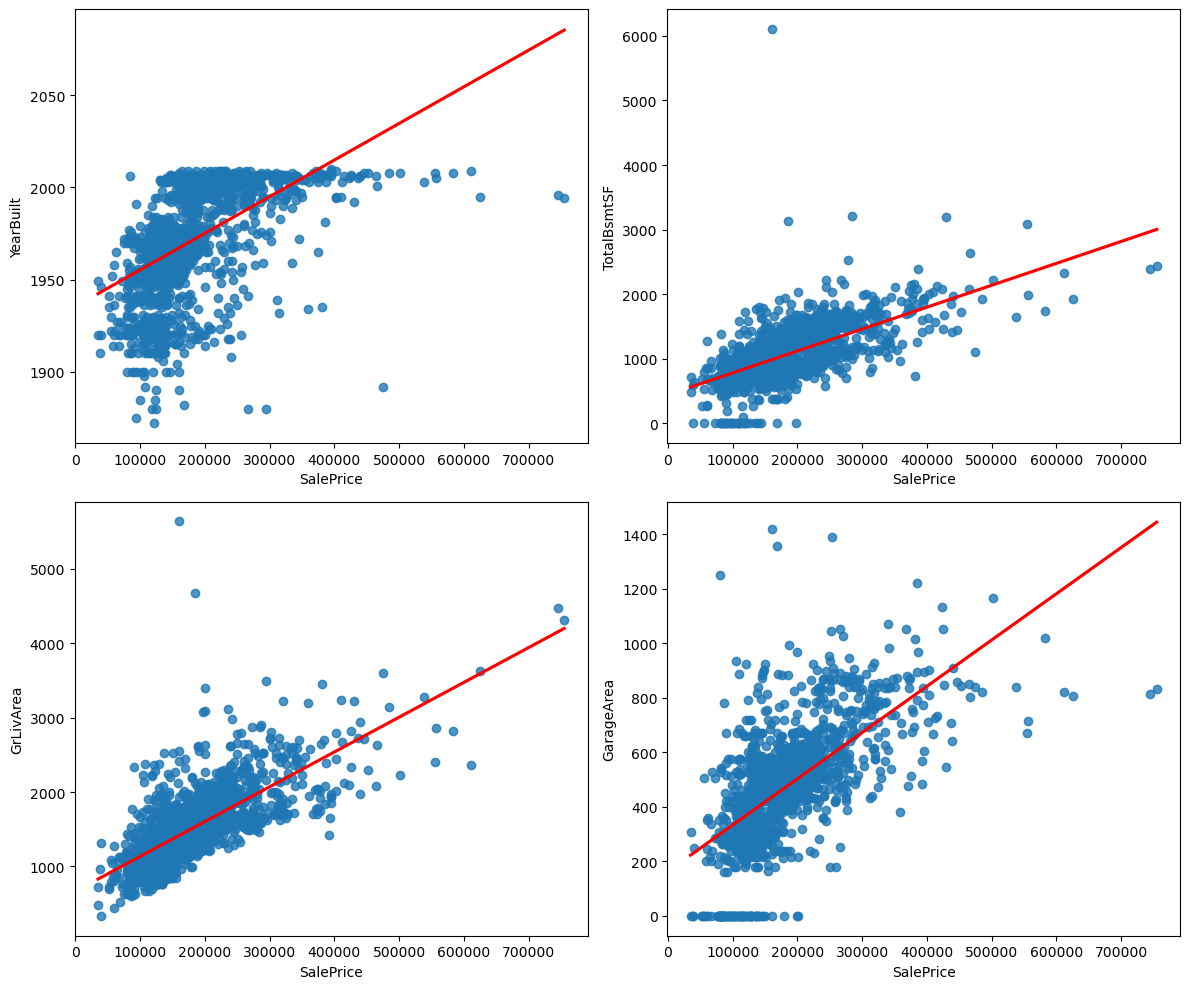

In [16]:
# Number Vs Number
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci=0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()
        

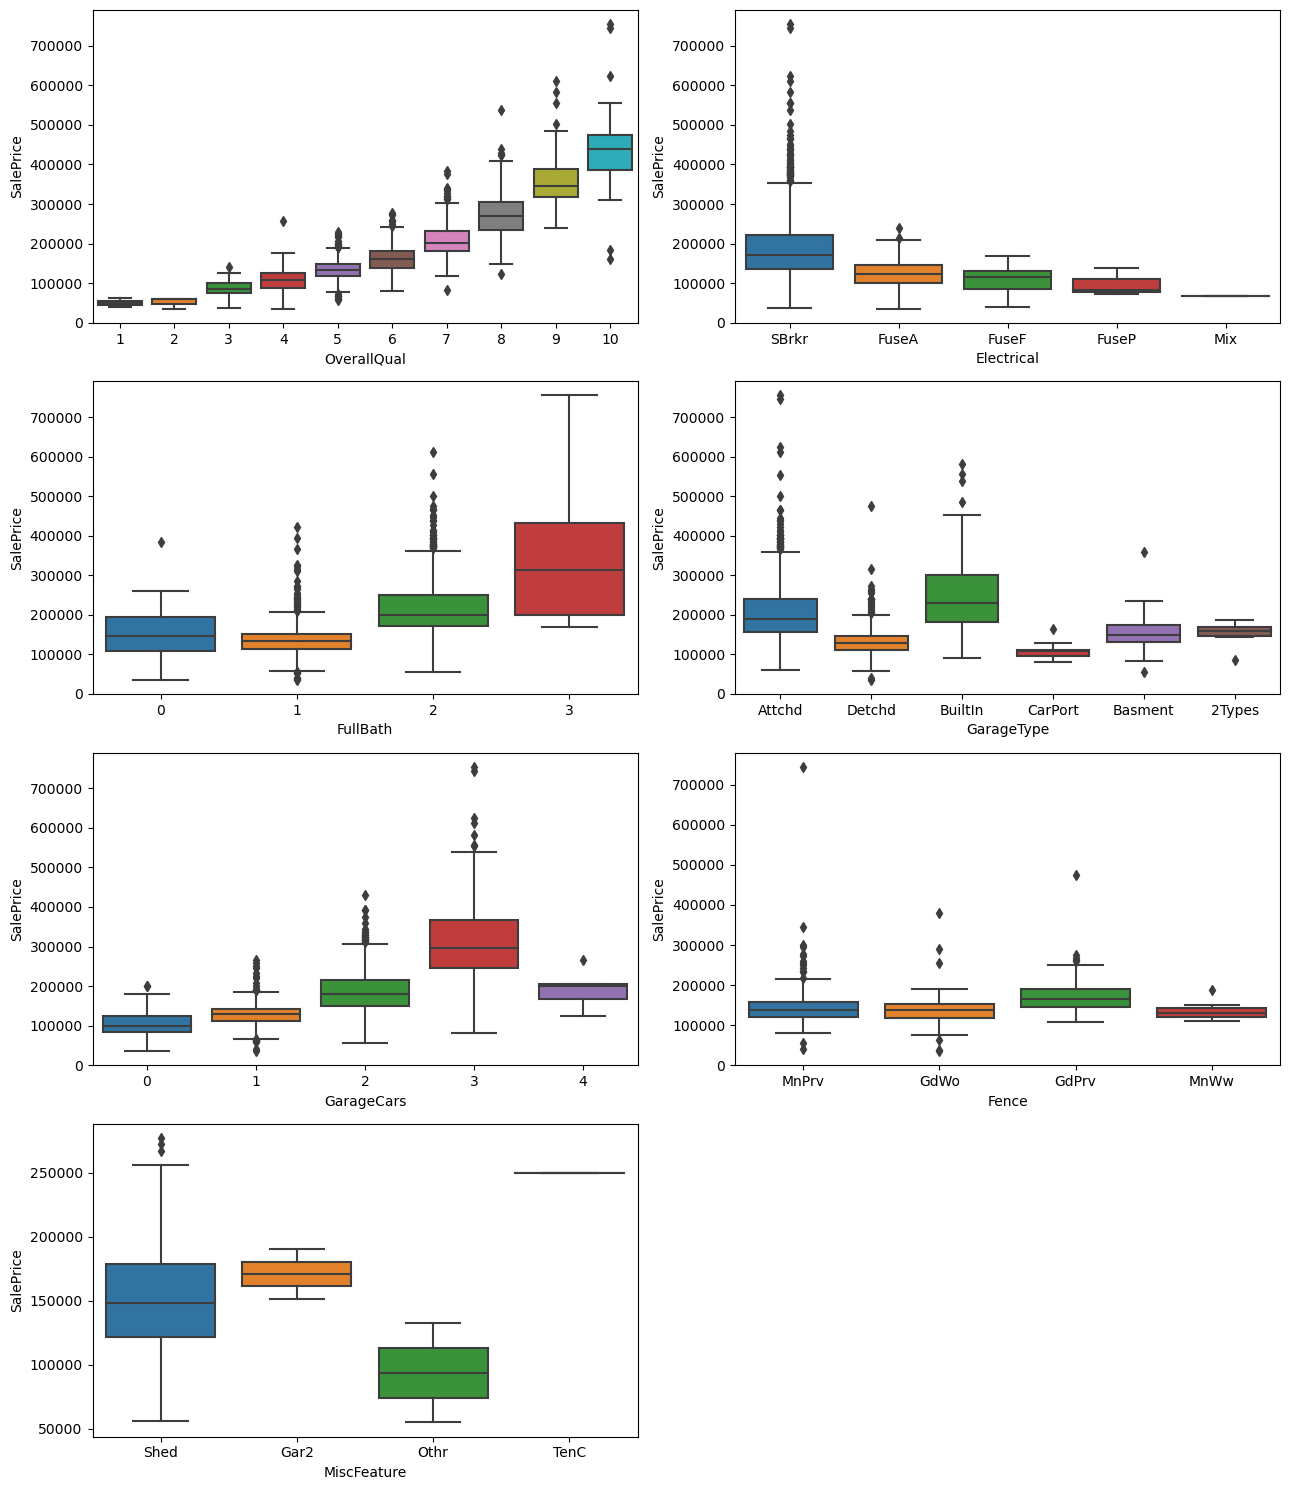

In [17]:
# Number Vs Category
plt.figure(figsize=(13,15))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x=i,y='SalePrice')
    t+=1
plt.tight_layout()
plt.show()

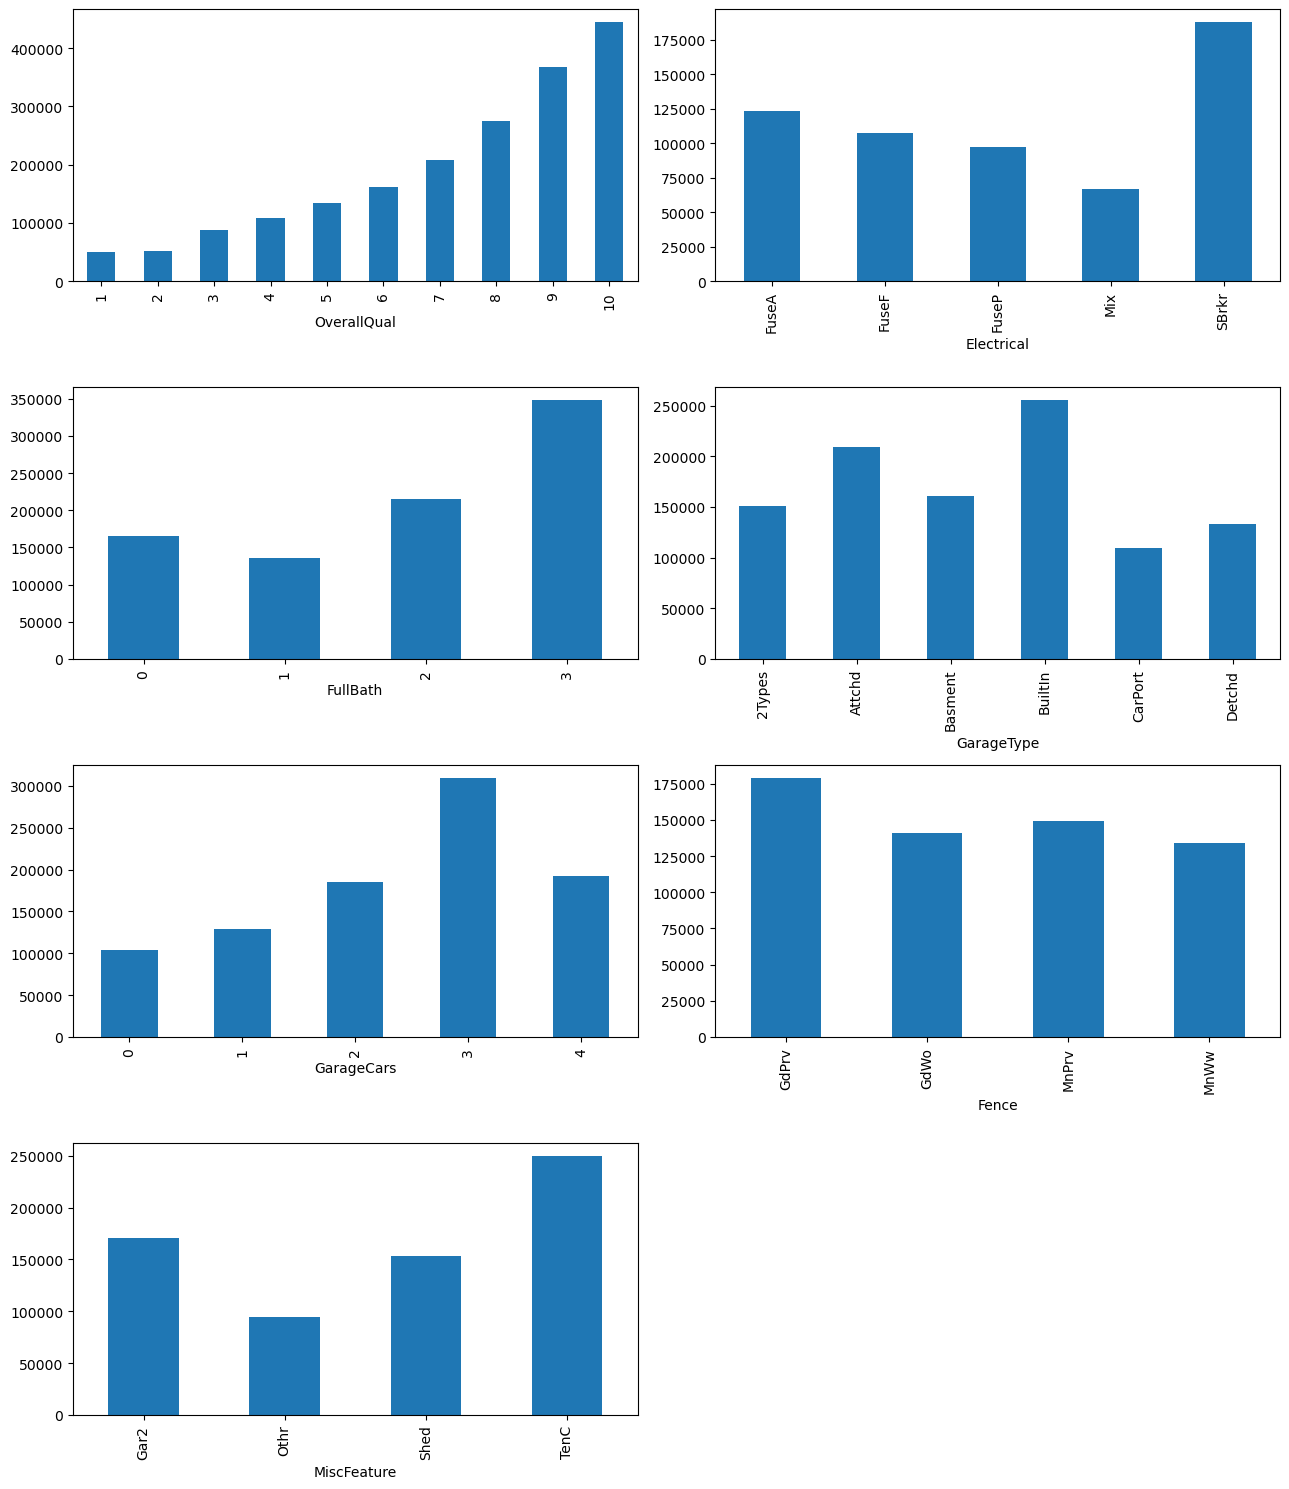

In [18]:
plt.figure(figsize=(13,15))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

### Satistical Analysis

#### Key Inferences
* YearBuilt, GrLivArea, TotalBsmtSF and GarageArea are related to the slae price
* BuiltQual, Electrical, FullBath, GarageType and GarageCars are affecting the SalePrice 

In [19]:
# Lets explore yearbuilt and Saleprice statistically

In [20]:
# Assumptions : Data must be normal

# Ho: The data is normal
# Ha: The data is not normal


print(stats.shapiro(data['SalePrice']))
print(stats.shapiro(data['YearBuilt']))

# Since both pvalues are less than 0.05 we have to reject Ho. SO we can go with spearman's correlation
# test (non parametric)

ShapiroResult(statistic=0.8717886209487915, pvalue=1.371634693338205e-32)
ShapiroResult(statistic=0.9247534275054932, pvalue=4.7268936789807727e-26)


In [21]:
# Spearman's correlation test
# Ho: Samples are independent
# Ha: Samples are dependent

print(stats.spearmanr(data['SalePrice'],data['YearBuilt']))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)


In [22]:
for i in num_cols:
    if i != 'SalePrice':
        print(stats.spearmanr(data['SalePrice'],data[i]))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)
SignificanceResult(statistic=0.610789140940605, pvalue=9.424659979319682e-146)
SignificanceResult(statistic=0.7352976571006725, pvalue=1.7737764527778764e-241)
SignificanceResult(statistic=0.6598555665561451, pvalue=5.419048779956526e-178)


In [23]:
# Lets proove statistically the affect of garagetype on Saleprice

In [24]:
data['GarageType'].unique()

array(['Attchd', 'Detchd', nan, 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [25]:
# Kruskal Walli's Test
# Ho: mu1=mu2=...mu6
# Ha: atleast one mean is different

s1 = data[data['GarageType']=='Attchd']['SalePrice']
s2 = data[data['GarageType']=='Detchd']['SalePrice']
s3 = data[data['GarageType']=='BuiltIn']['SalePrice']
s4 = data[data['GarageType']=='CarPort']['SalePrice']
s5 = data[data['GarageType']=='Basment']['SalePrice']
s6 = data[data['GarageType']=='2Types']['SalePrice']

print(stats.kruskal(s1,s2,s3,s4,s5,s6))

KruskalResult(statistic=440.6623751087267, pvalue=5.0735517569761e-93)


## Data Preprocessing

### Feature Engineering

In [26]:
# We will create  a new column age by assuming the tha data was collected
# in 2010. We will subtract 2010 and yearbuilt.

data['Age'] = 2010 - data['YearBuilt']

data.drop(columns=['YearBuilt'],inplace=True)
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34


<Axes: xlabel='SalePrice', ylabel='Age'>

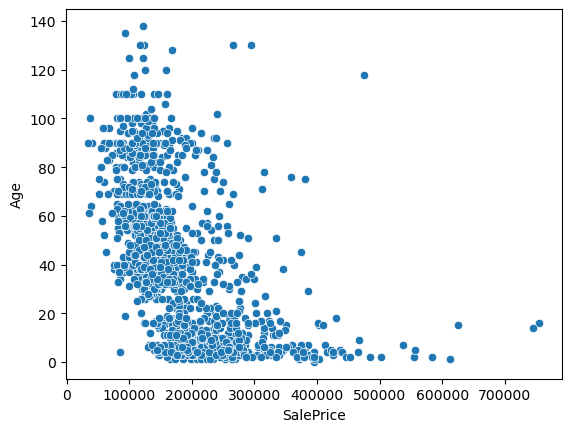

In [27]:
sns.scatterplot(x=data['SalePrice'],y=data['Age'])

In [28]:
data[['SalePrice','Age']].corr()

,SalePrice,Age
SalePrice,1.000000,-0.528006
Age,-0.528006,1.000000


### Missing Values

In [29]:
missing_pec = ((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

In [30]:
missing_pec[missing_pec>0]

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
dtype: float64

In [31]:
# Missing value Value

# Closest fit
# Central Value imputation
# Deletion (Lot of data is missing in a column or very few rows in the data
# has missing columns)

In [32]:
# Lets treat the missing value in Electrical

data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1339,5,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500,4


In [33]:
# Central value imputation
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [34]:
data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [35]:
data.groupby(by='GarageCars')['GarageType'].describe(include=object)

,count,unique,top,freq
GarageCars,,,,
0,0,0,NaN,NaN
1,302,5,Detchd,178
2,787,6,Attchd,556
3,181,4,Attchd,138
4,5,3,Detchd,3


In [36]:
# Lets treat missing values in GarageType
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
37,4,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000,55
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70
1407,5,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000,40
1408,5,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000,36
1411,5,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500,4


In [37]:
# Lets impute the missing values where garage area and garage cars are 0
# with new category 'NoGarage'

data['GarageType'] = np.where((data['GarageArea']==0)&(data['GarageCars']==0),
                             'NoGarage',
                             data['GarageType'])

In [38]:
data[data['GarageType'].isnull()]['GarageCars'].value_counts()

GarageCars
1    62
Name: count, dtype: int64

In [39]:
# Since mode of GarageType where garageCars is 1 is 'Detchd'
data['GarageType'].fillna('Detchd',inplace=True)

In [40]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [41]:
data.GarageType.value_counts()

GarageType
Attchd      800
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

In [42]:
# Lets treat missing values in Fence
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [43]:
# Lets bin this data into 0-Fence not present, 1-Fence present

data['Fence'] = np.where(data['Fence'].isnull(),0,1)

In [44]:
data['Fence'].value_counts()

Fence
0    1148
1     270
Name: count, dtype: int64

In [45]:
# Lets validate this statically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['Fence']==0]['SalePrice'],
                  data[data['Fence']==1]['SalePrice'])

MannwhitneyuResult(statistic=201362.0, pvalue=1.842459050609252e-14)

<Axes: xlabel='Fence', ylabel='SalePrice'>

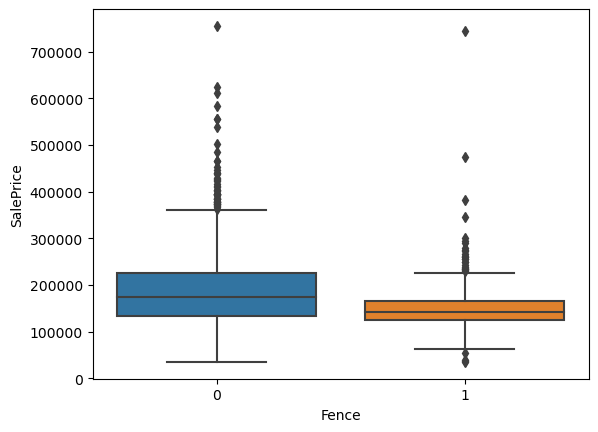

In [46]:
sns.boxplot(x=data['Fence'],y=data['SalePrice'])

In [47]:
# Lets treat missing values in MiscFeature
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [48]:
# Lets assume Nan's here means no Misc Feature
# 1 - MiscFeature Yes
# 0 - MiscFeature No
data['MiscFeature'] = np.where(data['MiscFeature'].isnull(),0,1)
data['MiscFeature'].value_counts()

MiscFeature
0    1366
1      52
Name: count, dtype: int64

In [49]:
# Lets validate this statically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['MiscFeature']==0]['SalePrice'],
                  data[data['MiscFeature']==1]['SalePrice'])

MannwhitneyuResult(statistic=42639.5, pvalue=0.013980740442174016)

<Axes: xlabel='MiscFeature'>

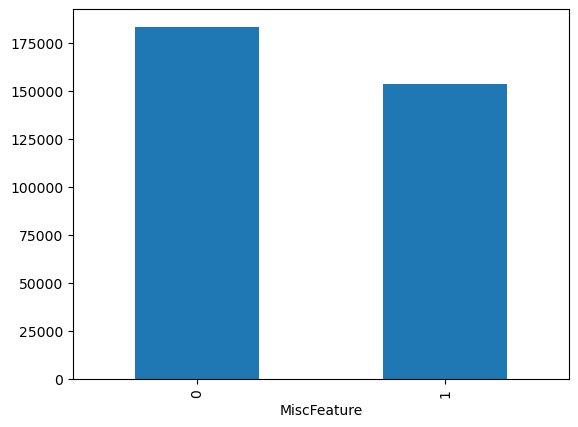

In [50]:
data.groupby(by='MiscFeature')['SalePrice'].mean().plot(kind='bar')

In [51]:
data.isnull().sum()

OverallQual    0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
Fence          0
MiscFeature    0
SalePrice      0
Age            0
dtype: int64

### Outlier Treatment

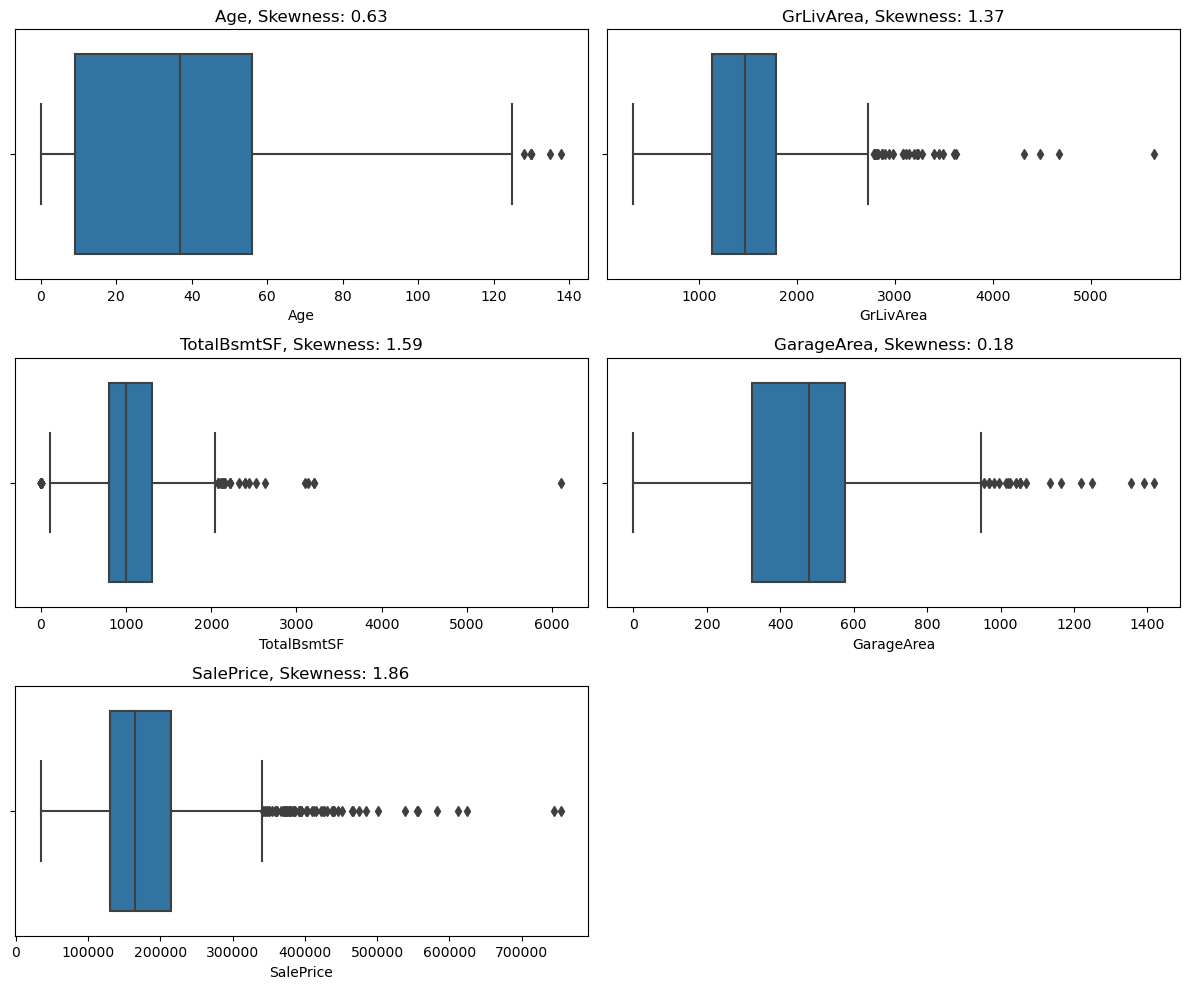

In [52]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [53]:
data[data['TotalBsmtSF']>6000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [54]:
data[data['GrLivArea']>5000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [55]:
data[data['SalePrice']>700000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
665,10,2444,SBrkr,4316,3,Attchd,3,832,0,0,755000,16
1147,10,2396,SBrkr,4476,3,Attchd,3,813,1,0,745000,14


In [56]:
data.drop(index=[1260],inplace=True)

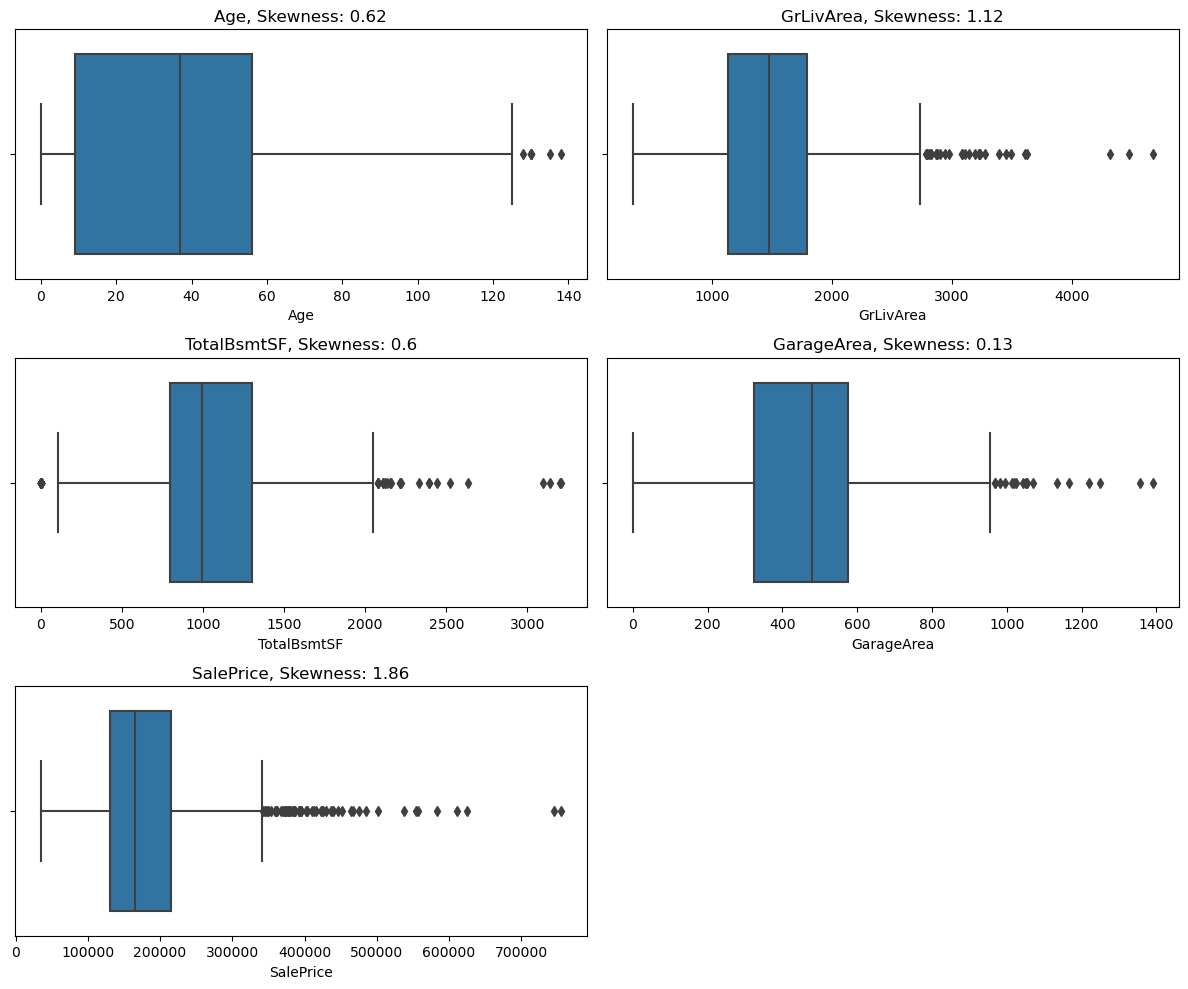

In [57]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [58]:
# Cap the outliers
# Remove the outliers

In [59]:
# Lets cap the outliers to 99th percentile in GarageArea,
# TotalbsmtSF, GrLivArea

for i in ['GarageArea','TotalBsmtSF','GrLivArea']:
    ul = np.percentile(data[i],99)
    data[i] = np.where(data[i]>ul,ul,data[i])

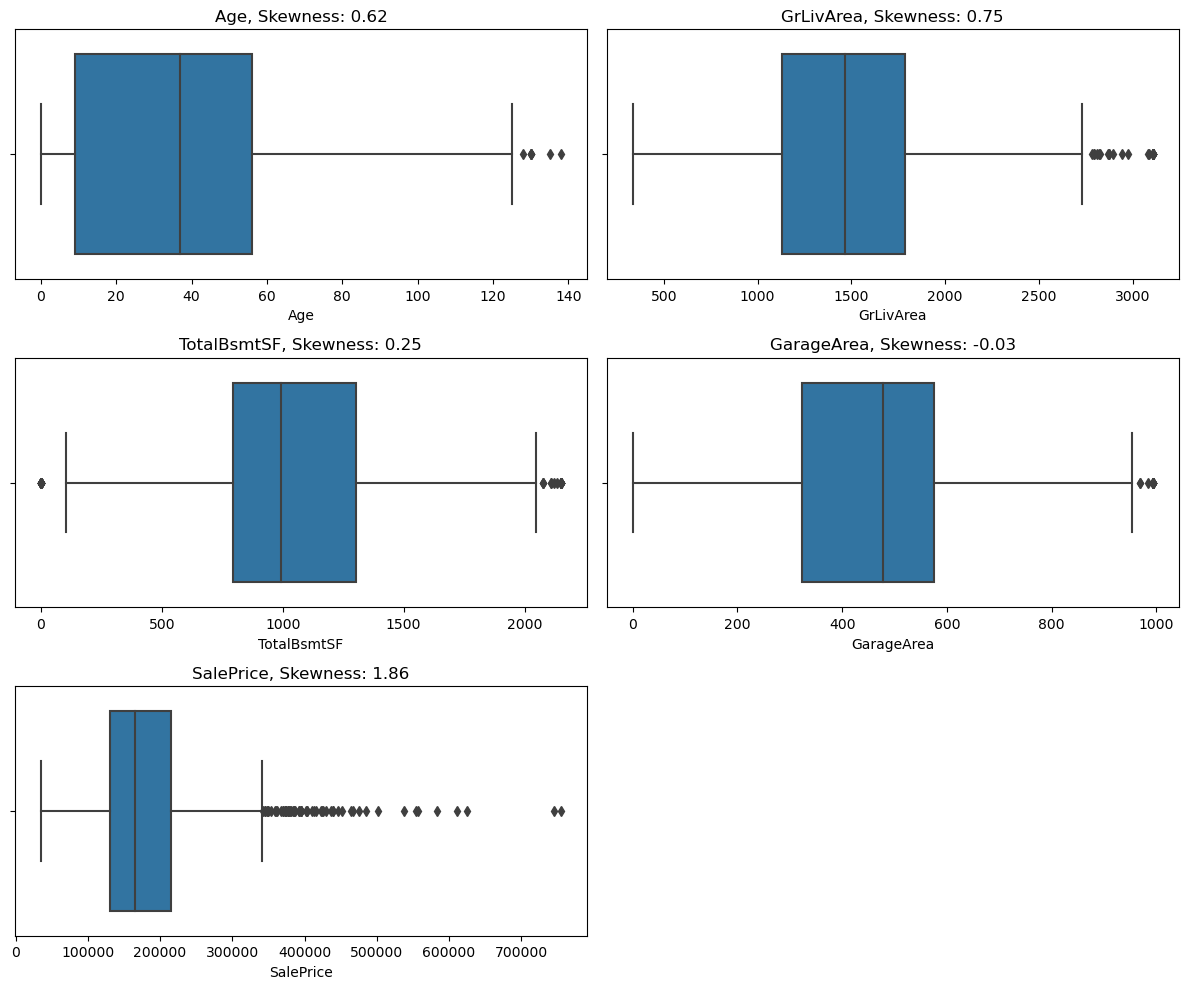

In [60]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i}, Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

### Encoding

In [61]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,SBrkr,1710.0,2,Attchd,2,548.0,0,0,208500,7
1,6,1262.0,SBrkr,1262.0,2,Attchd,2,460.0,0,0,181500,34


In [62]:
data['Electrical'].value_counts()

Electrical
SBrkr    1300
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: count, dtype: int64

In [63]:
data['Electrical'] = np.where(data['Electrical']=='SBrkr',1,0)
data.head()

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,1,1710.0,2,Attchd,2,548.0,0,0,208500,7
1,6,1262.0,1,1262.0,2,Attchd,2,460.0,0,0,181500,34
2,7,920.0,1,1786.0,2,Attchd,2,608.0,0,0,223500,9
3,7,756.0,1,1717.0,1,Detchd,3,642.0,0,0,140000,95
4,8,1145.0,1,2198.0,2,Attchd,3,836.0,0,0,250000,10


In [64]:
data['GarageType'].value_counts()

GarageType
Attchd      799
Detchd      416
BuiltIn      87
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: count, dtype: int64

In [65]:
def garagetype(s):
    if s in ['Basment','CarPort','2Types']:
        return 'Others'
    else:
        return s

In [66]:
data['GarageType'] = data['GarageType'].apply(garagetype)

In [67]:
data['GarageType'].value_counts()

GarageType
Attchd      799
Detchd      416
BuiltIn      87
NoGarage     81
Others       34
Name: count, dtype: int64

In [68]:
dicti = round(data.groupby(by='GarageType')['SalePrice'].mean(),0).to_dict()

In [69]:
dicti

{'Attchd': 208760.0,
 'BuiltIn': 255680.0,
 'Detchd': 133853.0,
 'NoGarage': 103317.0,
 'Others': 145535.0}

In [70]:
data['GarageType'] = data['GarageType'].map(dicti)

In [71]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856.0,1,1710.0,2,208760.0,2,548.0,0,0,208500,7
1,6,1262.0,1,1262.0,2,208760.0,2,460.0,0,0,181500,34


<Axes: xlabel='GarageType', ylabel='SalePrice'>

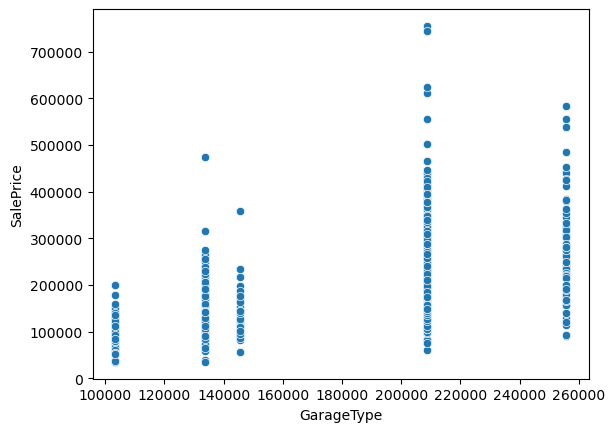

In [72]:
sns.scatterplot(y=data['SalePrice'],x=data['GarageType'])

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1417 non-null   int64  
 1   TotalBsmtSF  1417 non-null   float64
 2   Electrical   1417 non-null   int32  
 3   GrLivArea    1417 non-null   float64
 4   FullBath     1417 non-null   int64  
 5   GarageType   1417 non-null   float64
 6   GarageCars   1417 non-null   int64  
 7   GarageArea   1417 non-null   float64
 8   Fence        1417 non-null   int32  
 9   MiscFeature  1417 non-null   int32  
 10  SalePrice    1417 non-null   int64  
 11  Age          1417 non-null   int64  
dtypes: float64(4), int32(3), int64(5)
memory usage: 127.3 KB


# Day 5

In [77]:
# ML 
import scipy.stats as stats 
import statsmodels.api as sma 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.stats.diagnostic import linear_rainbow 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error 
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
#OLS
x=data.drop(columns=['SalePrice'])
y=

## Predictive modeling

In [80]:
# OLS MODEL

x  = data.drop(columns='SalePrice')
y = data['SalePrice']

base_model = sma.OLS(y,sma.add_constant(x)).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     496.8
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:40:17   Log-Likelihood:                -16883.
No. Observations:                1417   AIC:                         3.379e+04
Df Residuals:                    1405   BIC:                         3.385e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.956e+04   9069.211     -7.670      0.000   -8.74e+04   -5.18e+04
OverallQual  1.914e+04   1131.969     16.905      0.000    1.69e+04    2.14e+04
TotalBsmtSF    43.5213      3.020     14.412      0.000      37.597      49.445
Electrical   -646.1681   3775.960     -0.171      0.864   -8053.295    6760.959
GrLivArea      61.6409      3.102     19.869      0.000      55.555      67.727
FullBath    -7090.0980   2591.573     -2.736      0.006   -1.22e+04   -2006.328
GarageType     -0.0096      0.032     -0.299      0.765      -0.072       0.053
GarageCars   3126.8807   3104.349      1.007      0.314   -2962.778    9216.539
GarageArea     35.7175     10.540      3.389      0.001      15.042      56.393
Fence        -294.0269   2577.194     -0.114      0.909   -5349.589    4761.535
MiscFeature  1875.8482   5199.350      0.361      0.718   -8323.477    1.21e+04
Age          -344.6824     52.039     -6.624      0.000    -446.764    -242.601
==============================================================================
Omnibus:                      708.475   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15583.410
Skew:                           1.824   Prob(JB):                         0.00
Kurtosis:                      18.831   Cond. No.                     1.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# lets split the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=1)

In [94]:
def model_scores(trainx,trainy,testx,testy,model):
    m=model
    m.fit(trainx,trainy)
    pred=m.predict(testx)
    print('R-square:',r2_score(testy,pred))
    print('MSE:',mean_squared_error(testy,pred))
    print('RMSE:',np.sqrt(mean_squared_error(testy,pred)))
    print('MAPE:',mean_absolute_percentage_error(testy,pred))

In [99]:
#test data
model_scores(x_train,y_train,x_test,y_test, LinearRegression())

R-square: 0.7953925371660249
MSE: 1271149362.717411
RMSE: 35653.18166331598
MAPE: 0.15279547155710557


In [97]:
#train data
model_scores(x_train,y_train,x_train,y_train,LinearRegression())

R-square: 0.7949981200501836
MSE: 1323096576.5795012
RMSE: 36374.39451839028
MAPE: 0.14530156517074905


## Cross Validation

### K fold cross validation

In [101]:
from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score

In [103]:
kfold=KFold(n_splits=3)     # we need to pass the number of splits here

In [108]:
f1,f2,f3=kfold.split(x,y)   # here we got 3 folds

In [111]:
f3   # will give 1st fold for x and y    # f1+f2    # is giving indexes

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [125]:
cross_val=cross_val_score(estimator=LinearRegression(),X=x,y=y,cv=KFold(n_splits=5),scoring='r2',verbose=3)   # Kfold but it does the work itself
#cv=KFold(n_splits=3) used to specify the number of splits
#scoring='r2'---- to use the kind of scoreing method to use
#,verbose=3 - by default instructs the amount of info we want

[CV] END ................................ score: (test=0.819) total time=   0.0s
[CV] END ................................ score: (test=0.819) total time=   0.0s
[CV] END ................................ score: (test=0.769) total time=   0.0s
[CV] END ................................ score: (test=0.774) total time=   0.0s
[CV] END ................................ score: (test=0.773) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [123]:
cross_val

array([0.81895205, 0.81876611, 0.76872445, 0.77359253, 0.77327046])

In [124]:
# instead of giving the above score this is a better way of telling the score 
print('R2 of model is',np.mean(cross_val))
print('With Variation:',(np.std(cross_val)/np.mean(cross_val))*100)

R2 of model is 0.7906611210907504
With Variation: 2.9200755986486127


In [ ]:
#Infrance- the R2 or the score  of  the model can be considered to be 0.79 with 3% of variation
# this shows that model is a generalized model with less variance


### LOOCV(Leave one out cross validation)

In [127]:
loocv=cross_val_score(estimator=LinearRegression(),     # scoring='neg_mean_square_error'- to convert error to score
                     X=x,y=y,cv=LeaveOneOut(),
                     scoring='neg_mean_squared_error',verbose=3)

#can also pass scoring='neg_mean_absolute_percentage_error'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ........................ score: (test=-26547445.424) total time=   0.0s
[CV] END ........................ score: (test=-88956413.665) total time=   0.0s
[CV] END .......................... score: (test=-884840.775) total time=   0.0s
[CV] END ...................... score: (test=-2982143905.983) total time=   0.0s
[CV] END ...................... score: (test=-1442316531.957) total time=   0.0s
[CV] END ....................... score: (test=-129811431.565) total time=   0.0s
[CV] END ...................... score: (test=-1278278114.959) total time=   0.0s
[CV] END ...................... score: (test=-1448688528.279) total time=   0.0s
[CV] END ........................ score: (test=-29459693.353) total time=   0.0s
[CV] END ......................... score: (test=-2912245.504) total time=   0.0s
[CV] END ...................... score: (test=-1494949398.488) total time=   0.0s
[CV] END ...................... score: (test=-1020639454.227) total time=   0.0s
[CV] END ...................

[CV] END .......................... score: (test=-159862.055) total time=   0.0s
[CV] END ........................ score: (test=-79862966.704) total time=   0.0s
[CV] END ......................... score: (test=-8668494.593) total time=   0.0s
[CV] END ....................... score: (test=-883239198.163) total time=   0.0s
[CV] END ........................ score: (test=-29165354.230) total time=   0.0s
[CV] END ......................... score: (test=-2926794.776) total time=   0.0s
[CV] END ........................ score: (test=-38691385.977) total time=   0.0s
[CV] END ...................... score: (test=-2058098297.132) total time=   0.0s
[CV] END ........................ score: (test=-32420422.014) total time=   0.0s
[CV] END ..................... score: (test=-10937552479.292) total time=   0.0s
[CV] END ....................... score: (test=-559356449.066) total time=   0.0s
[CV] END ...................... score: (test=-1290891252.399) total time=   0.0s
[CV] END ...................

[CV] END ........................ score: (test=-17343869.086) total time=   0.0s
[CV] END ....................... score: (test=-276518048.381) total time=   0.0s
[CV] END ....................... score: (test=-366392323.051) total time=   0.0s
[CV] END ....................... score: (test=-145080353.719) total time=   0.0s
[CV] END ....................... score: (test=-253906806.276) total time=   0.0s
[CV] END ....................... score: (test=-137051213.100) total time=   0.0s
[CV] END ....................... score: (test=-251770881.798) total time=   0.0s
[CV] END ....................... score: (test=-130926258.200) total time=   0.0s
[CV] END ...................... score: (test=-1615115891.547) total time=   0.0s
[CV] END ........................ score: (test=-13709335.912) total time=   0.0s
[CV] END ...................... score: (test=-1707529854.877) total time=   0.0s
[CV] END ....................... score: (test=-352083079.025) total time=   0.0s
[CV] END ...................

[CV] END ......................... score: (test=-7168859.358) total time=   0.0s
[CV] END ...................... score: (test=-3437579842.056) total time=   0.0s
[CV] END ....................... score: (test=-219018519.111) total time=   0.0s
[CV] END ...................... score: (test=-1149436481.508) total time=   0.0s
[CV] END ...................... score: (test=-4609018002.113) total time=   0.0s
[CV] END ....................... score: (test=-507803782.531) total time=   0.0s
[CV] END ....................... score: (test=-271982732.885) total time=   0.0s
[CV] END ....................... score: (test=-468865368.479) total time=   0.0s
[CV] END ....................... score: (test=-180881952.772) total time=   0.0s
[CV] END ........................ score: (test=-20241001.094) total time=   0.0s
[CV] END ....................... score: (test=-743984609.556) total time=   0.0s
[CV] END ........................ score: (test=-12771381.588) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-425275877.241) total time=   0.0s
[CV] END ....................... score: (test=-477485397.886) total time=   0.0s
[CV] END ......................... score: (test=-9273727.787) total time=   0.0s
[CV] END ....................... score: (test=-657189808.519) total time=   0.0s
[CV] END ....................... score: (test=-105094465.864) total time=   0.0s
[CV] END ....................... score: (test=-129640604.871) total time=   0.0s
[CV] END ....................... score: (test=-876220594.864) total time=   0.0s
[CV] END ....................... score: (test=-270290311.247) total time=   0.0s
[CV] END ...................... score: (test=-2053286865.897) total time=   0.0s
[CV] END ...................... score: (test=-2031208622.110) total time=   0.0s
[CV] END ....................... score: (test=-341326364.892) total time=   0.0s
[CV] END ....................... score: (test=-122263336.256) total time=   0.0s
[CV] END ...................

[CV] END ........................ score: (test=-27359567.754) total time=   0.0s
[CV] END ....................... score: (test=-595540424.269) total time=   0.0s
[CV] END ...................... score: (test=-4305369315.673) total time=   0.0s
[CV] END ....................... score: (test=-176971986.296) total time=   0.0s
[CV] END ........................ score: (test=-17401668.333) total time=   0.0s
[CV] END ...................... score: (test=-2312740384.806) total time=   0.0s
[CV] END ..................... score: (test=-16159170131.729) total time=   0.0s
[CV] END ....................... score: (test=-359404279.375) total time=   0.0s
[CV] END ....................... score: (test=-866699536.178) total time=   0.0s
[CV] END ...................... score: (test=-2801925157.237) total time=   0.0s
[CV] END ...................... score: (test=-4231826285.117) total time=   0.0s
[CV] END ....................... score: (test=-951037686.926) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-1973045330.487) total time=   0.0s
[CV] END .......................... score: (test=-414918.234) total time=   0.0s
[CV] END ....................... score: (test=-204174218.543) total time=   0.0s
[CV] END ........................ score: (test=-23318827.408) total time=   0.0s
[CV] END ....................... score: (test=-137936601.845) total time=   0.0s
[CV] END ....................... score: (test=-543596845.457) total time=   0.0s
[CV] END ...................... score: (test=-1417698982.724) total time=   0.0s
[CV] END ....................... score: (test=-191886061.331) total time=   0.0s
[CV] END ........................ score: (test=-96014901.660) total time=   0.0s
[CV] END ........................ score: (test=-19278693.958) total time=   0.0s
[CV] END ........................ score: (test=-16404175.755) total time=   0.0s
[CV] END ......................... score: (test=-7810692.868) total time=   0.0s
[CV] END ...................

[CV] END ........................ score: (test=-63250956.690) total time=   0.0s
[CV] END ......................... score: (test=-4042098.551) total time=   0.0s
[CV] END .......................... score: (test=-647127.033) total time=   0.0s
[CV] END ....................... score: (test=-159756532.192) total time=   0.0s
[CV] END ...................... score: (test=-1468160993.923) total time=   0.0s
[CV] END ........................ score: (test=-66804241.155) total time=   0.0s
[CV] END ...................... score: (test=-1321478961.192) total time=   0.0s
[CV] END ............................ score: (test=-2524.925) total time=   0.0s
[CV] END ....................... score: (test=-131861095.869) total time=   0.0s
[CV] END ....................... score: (test=-895530598.738) total time=   0.0s
[CV] END ............................ score: (test=-6676.133) total time=   0.0s
[CV] END ....................... score: (test=-657455111.008) total time=   0.0s
[CV] END ...................

[CV] END ......................... score: (test=-8402543.847) total time=   0.0s
[CV] END ........................ score: (test=-18674670.268) total time=   0.0s
[CV] END ....................... score: (test=-279654645.936) total time=   0.0s
[CV] END ....................... score: (test=-565430215.421) total time=   0.0s
[CV] END ........................ score: (test=-92805702.225) total time=   0.0s
[CV] END ........................ score: (test=-91193376.380) total time=   0.0s
[CV] END ....................... score: (test=-476946010.507) total time=   0.0s
[CV] END ........................ score: (test=-23881387.063) total time=   0.0s
[CV] END ...................... score: (test=-1599186724.232) total time=   0.0s
[CV] END ....................... score: (test=-254721493.847) total time=   0.0s
[CV] END ...................... score: (test=-1430403336.548) total time=   0.0s
[CV] END ...................... score: (test=-1505977584.600) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-960577464.781) total time=   0.0s
[CV] END ...................... score: (test=-2428717365.790) total time=   0.0s
[CV] END ........................ score: (test=-33848012.507) total time=   0.0s
[CV] END ............................ score: (test=-2495.582) total time=   0.0s
[CV] END ...................... score: (test=-3766604633.444) total time=   0.0s
[CV] END ....................... score: (test=-434491924.543) total time=   0.0s
[CV] END ........................ score: (test=-89696075.576) total time=   0.0s
[CV] END ........................ score: (test=-21015007.092) total time=   0.0s
[CV] END ....................... score: (test=-646013624.878) total time=   0.0s
[CV] END ....................... score: (test=-391477531.074) total time=   0.0s
[CV] END ...................... score: (test=-3398962877.387) total time=   0.0s
[CV] END ....................... score: (test=-345756618.060) total time=   0.0s
[CV] END ...................

[CV] END ...................... score: (test=-2422063057.321) total time=   0.0s
[CV] END ...................... score: (test=-1189159882.528) total time=   0.0s
[CV] END ....................... score: (test=-812353105.381) total time=   0.0s
[CV] END .......................... score: (test=-220641.102) total time=   0.0s
[CV] END ....................... score: (test=-491064674.291) total time=   0.0s
[CV] END ....................... score: (test=-212091510.251) total time=   0.0s
[CV] END ........................ score: (test=-15420713.186) total time=   0.0s
[CV] END ........................ score: (test=-52657524.258) total time=   0.0s
[CV] END ........................ score: (test=-30706423.536) total time=   0.0s
[CV] END ........................ score: (test=-96083775.602) total time=   0.0s
[CV] END ........................ score: (test=-23482500.896) total time=   0.0s
[CV] END ....................... score: (test=-129883086.181) total time=   0.0s
[CV] END ...................

[CV] END ....................... score: (test=-235438213.702) total time=   0.0s
[CV] END ....................... score: (test=-271334967.357) total time=   0.0s
[CV] END ....................... score: (test=-267548563.459) total time=   0.0s
[CV] END ......................... score: (test=-1197933.791) total time=   0.0s
[CV] END ........................ score: (test=-60552780.742) total time=   0.0s
[CV] END ...................... score: (test=-1694147224.537) total time=   0.0s
[CV] END ....................... score: (test=-215583985.063) total time=   0.0s
[CV] END ........................ score: (test=-44996990.036) total time=   0.0s
[CV] END ....................... score: (test=-132462991.779) total time=   0.0s
[CV] END ....................... score: (test=-324629346.454) total time=   0.0s
[CV] END ....................... score: (test=-686115184.656) total time=   0.0s
[CV] END ....................... score: (test=-159097787.664) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done 1417 out of 1417 | elapsed:    7.3s finished


In [131]:
loocv

array([-0.02471185, -0.05196513, -0.00420877, ..., -0.13369085,
       -0.1421115 , -0.01063461])

In [ ]:
print

In [129]:
loocv=cross_val_score(estimator=LinearRegression(),    
                     X=x,y=y,cv=LeaveOneOut(),
                     scoring='neg_mean_absolute_percentage_error',verbose=3)
# model is being applied row wise 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] END ............................... score: (test=-0.025) total time=   0.0s
[CV] END ............................... score: (test=-0.052) total time=   0.0s
[CV] END ............................... score: (test=-0.004) total time=   0.0s
[CV] END ............................... score: (test=-0.390) total time=   0.0s
[CV] END ............................... score: (test=-0.152) total time=   0.0s
[CV] END ............................... score: (test=-0.080) total time=   0.0s
[CV] END ............................... score: (test=-0.116) total time=   0.0s
[CV] END ............................... score: (test=-0.190) total time=   0.0s
[CV] END ............................... score: (test=-0.046) total time=   0.0s
[CV] END ............................... score: (test=-0.013) total time=   0.0s
[CV] END ............................... score: (test=-0.112) total time=   0.0s
[CV] END ............................... score: (test=-0.222) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.027) total time=   0.0s
[CV] END ............................... score: (test=-0.175) total time=   0.0s
[CV] END ............................... score: (test=-0.132) total time=   0.0s
[CV] END ............................... score: (test=-0.069) total time=   0.0s
[CV] END ............................... score: (test=-0.130) total time=   0.0s
[CV] END ............................... score: (test=-0.086) total time=   0.0s
[CV] END ............................... score: (test=-0.056) total time=   0.0s
[CV] END ............................... score: (test=-0.131) total time=   0.0s
[CV] END ............................... score: (test=-0.187) total time=   0.0s
[CV] END ............................... score: (test=-0.003) total time=   0.0s
[CV] END ............................... score: (test=-0.060) total time=   0.0s
[CV] END ............................... score: (test=-0.013) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.254) total time=   0.0s
[CV] END ............................... score: (test=-0.123) total time=   0.0s
[CV] END ............................... score: (test=-0.051) total time=   0.0s
[CV] END ............................... score: (test=-0.311) total time=   0.0s
[CV] END ............................... score: (test=-0.176) total time=   0.0s
[CV] END ............................... score: (test=-0.106) total time=   0.0s
[CV] END ............................... score: (test=-0.112) total time=   0.0s
[CV] END ............................... score: (test=-0.322) total time=   0.0s
[CV] END ............................... score: (test=-0.005) total time=   0.0s
[CV] END ............................... score: (test=-0.294) total time=   0.0s
[CV] END ............................... score: (test=-0.362) total time=   0.0s
[CV] END ............................... score: (test=-0.181) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.166) total time=   0.0s
[CV] END ............................... score: (test=-0.041) total time=   0.0s
[CV] END ............................... score: (test=-0.027) total time=   0.0s
[CV] END ............................... score: (test=-0.165) total time=   0.0s
[CV] END ............................... score: (test=-0.018) total time=   0.0s
[CV] END ............................... score: (test=-0.046) total time=   0.0s
[CV] END ............................... score: (test=-0.117) total time=   0.0s
[CV] END ............................... score: (test=-0.091) total time=   0.0s
[CV] END ............................... score: (test=-0.087) total time=   0.0s
[CV] END ............................... score: (test=-0.090) total time=   0.0s
[CV] END ............................... score: (test=-0.063) total time=   0.0s
[CV] END ............................... score: (test=-0.063) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.148) total time=   0.0s
[CV] END ............................... score: (test=-0.065) total time=   0.0s
[CV] END ............................... score: (test=-0.061) total time=   0.0s
[CV] END ............................... score: (test=-0.028) total time=   0.0s
[CV] END ............................... score: (test=-0.738) total time=   0.0s
[CV] END ............................... score: (test=-0.176) total time=   0.0s
[CV] END ............................... score: (test=-0.125) total time=   0.0s
[CV] END ............................... score: (test=-0.192) total time=   0.0s
[CV] END ............................... score: (test=-0.198) total time=   0.0s
[CV] END ............................... score: (test=-0.043) total time=   0.0s
[CV] END ............................... score: (test=-0.109) total time=   0.0s
[CV] END ............................... score: (test=-0.008) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.017) total time=   0.0s
[CV] END ............................... score: (test=-0.081) total time=   0.0s
[CV] END ............................... score: (test=-0.089) total time=   0.0s
[CV] END ............................... score: (test=-0.020) total time=   0.0s
[CV] END ............................... score: (test=-0.428) total time=   0.0s
[CV] END ............................... score: (test=-0.025) total time=   0.0s
[CV] END ............................... score: (test=-0.030) total time=   0.0s
[CV] END ............................... score: (test=-0.006) total time=   0.0s
[CV] END ............................... score: (test=-0.283) total time=   0.0s
[CV] END ............................... score: (test=-0.027) total time=   0.0s
[CV] END ............................... score: (test=-0.100) total time=   0.0s
[CV] END ............................... score: (test=-0.030) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.186) total time=   0.0s
[CV] END ............................... score: (test=-0.066) total time=   0.0s
[CV] END ............................... score: (test=-0.086) total time=   0.0s
[CV] END ............................... score: (test=-0.386) total time=   0.0s
[CV] END ............................... score: (test=-0.011) total time=   0.0s
[CV] END ............................... score: (test=-0.021) total time=   0.0s
[CV] END ............................... score: (test=-0.454) total time=   0.0s
[CV] END ............................... score: (test=-0.174) total time=   0.0s
[CV] END ............................... score: (test=-0.051) total time=   0.0s
[CV] END ............................... score: (test=-0.084) total time=   0.0s
[CV] END ............................... score: (test=-0.063) total time=   0.0s
[CV] END ............................... score: (test=-0.310) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.016) total time=   0.0s
[CV] END ............................... score: (test=-0.047) total time=   0.0s
[CV] END ............................... score: (test=-0.140) total time=   0.0s
[CV] END ............................... score: (test=-0.114) total time=   0.0s
[CV] END ............................... score: (test=-0.067) total time=   0.0s
[CV] END ............................... score: (test=-0.019) total time=   0.0s
[CV] END ............................... score: (test=-0.101) total time=   0.0s
[CV] END ............................... score: (test=-0.045) total time=   0.0s
[CV] END ............................... score: (test=-0.362) total time=   0.0s
[CV] END ............................... score: (test=-0.171) total time=   0.0s
[CV] END ............................... score: (test=-0.055) total time=   0.0s
[CV] END ............................... score: (test=-0.165) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.210) total time=   0.0s
[CV] END ............................... score: (test=-0.143) total time=   0.0s
[CV] END ............................... score: (test=-0.062) total time=   0.0s
[CV] END ............................... score: (test=-0.025) total time=   0.0s
[CV] END ............................... score: (test=-0.118) total time=   0.0s
[CV] END ............................... score: (test=-0.051) total time=   0.0s
[CV] END ............................... score: (test=-0.495) total time=   0.0s
[CV] END ............................... score: (test=-0.091) total time=   0.0s
[CV] END ............................... score: (test=-0.127) total time=   0.0s
[CV] END ............................... score: (test=-0.352) total time=   0.0s
[CV] END ............................... score: (test=-0.183) total time=   0.0s
[CV] END ............................... score: (test=-0.289) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.228) total time=   0.0s
[CV] END ............................... score: (test=-0.126) total time=   0.0s
[CV] END ............................... score: (test=-0.020) total time=   0.0s
[CV] END ............................... score: (test=-0.031) total time=   0.0s
[CV] END ............................... score: (test=-0.146) total time=   0.0s
[CV] END ............................... score: (test=-0.110) total time=   0.0s
[CV] END ............................... score: (test=-0.084) total time=   0.0s
[CV] END ............................... score: (test=-0.133) total time=   0.0s
[CV] END ............................... score: (test=-0.084) total time=   0.0s
[CV] END ............................... score: (test=-0.164) total time=   0.0s
[CV] END ............................... score: (test=-0.914) total time=   0.0s
[CV] END ............................... score: (test=-0.312) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.084) total time=   0.0s
[CV] END ............................... score: (test=-0.300) total time=   0.0s
[CV] END ............................... score: (test=-0.072) total time=   0.0s
[CV] END ............................... score: (test=-0.005) total time=   0.0s
[CV] END ............................... score: (test=-0.147) total time=   0.0s
[CV] END ............................... score: (test=-0.115) total time=   0.0s
[CV] END ............................... score: (test=-0.117) total time=   0.0s
[CV] END ............................... score: (test=-0.353) total time=   0.0s
[CV] END ............................... score: (test=-0.086) total time=   0.0s
[CV] END ............................... score: (test=-0.068) total time=   0.0s
[CV] END ............................... score: (test=-0.046) total time=   0.0s
[CV] END ............................... score: (test=-0.208) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.585) total time=   0.0s
[CV] END ............................... score: (test=-0.122) total time=   0.0s
[CV] END ............................... score: (test=-0.216) total time=   0.0s
[CV] END ............................... score: (test=-0.008) total time=   0.0s
[CV] END ............................... score: (test=-0.117) total time=   0.0s
[CV] END ............................... score: (test=-0.041) total time=   0.0s
[CV] END ............................... score: (test=-0.181) total time=   0.0s
[CV] END ............................... score: (test=-0.094) total time=   0.0s
[CV] END ............................... score: (test=-0.231) total time=   0.0s
[CV] END ............................... score: (test=-0.234) total time=   0.0s
[CV] END ............................... score: (test=-0.012) total time=   0.0s
[CV] END ............................... score: (test=-0.130) total time=   0.0s
[CV] END ...................

[CV] END ............................... score: (test=-0.326) total time=   0.0s
[CV] END ............................... score: (test=-0.163) total time=   0.0s
[CV] END ............................... score: (test=-0.433) total time=   0.0s
[CV] END ............................... score: (test=-0.194) total time=   0.0s
[CV] END ............................... score: (test=-0.081) total time=   0.0s
[CV] END ............................... score: (test=-0.021) total time=   0.0s
[CV] END ............................... score: (test=-0.616) total time=   0.0s
[CV] END ............................... score: (test=-0.125) total time=   0.0s
[CV] END ............................... score: (test=-0.067) total time=   0.0s
[CV] END ............................... score: (test=-0.058) total time=   0.0s
[CV] END ............................... score: (test=-0.007) total time=   0.0s
[CV] END ............................... score: (test=-0.057) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done 1417 out of 1417 | elapsed:    8.2s finished


In [130]:
print('MAPE:',np.abs(np.mean(loocv)))

MAPE: 0.1489090829381514


## Feature selection

In [140]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE,RFECV

### SFS(Sequential Feature Selection)


In [143]:
sfs_f=SequentialFeatureSelector(estimator=LinearRegression(),k_features='best',
                                scoring='r2',
                                cv=3,forward=True,verbose=3)
# by default forward=True--- selection technique
                                # by default cv is 5  min it can be 3
                                #verbose=3 to see the working 

In [145]:
sfs_f.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2024-02-09 14:13:32] Features: 1/11 -- score: 0.6409470924366167[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2024-02-09 14:13:32] Features: 2/11 -- score: 0.7321682553024921[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Para

SequentialFeatureSelector(cv=3, estimator=LinearRegression(),
                          k_features=(1, 11), scoring='r2', verbose=3)

In [146]:
sfs_f.k_score_

0.798515607659302

In [147]:
sfs_f.k_feature_names_

('OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'GarageCars',
 'GarageArea',
 'Age')

In [149]:
x_train_sfs=x_train[list(sfs_f.k_feature_names_)]
x_test_sfs=x_test[list(sfs_f.k_feature_names_)]

In [150]:
model_scores(x_train_sfs,y_train,x_test_sfs,y_test,LinearRegression())    # sight redution in error

R-square: 0.7959731331992638
MSE: 1267542337.502271
RMSE: 35602.56082787123
MAPE: 0.15253422555692342


###### Forward selection method

In [ ]:
# from null model to full model

Algorithm:
1. It starts from the null model
2. It adds the feature with the highest correlation with target in the model
3. It picks the 2nd column from the remaining dataset with heighest correlation 
4. It builds the model adding the new feature to it.
5. This repeats untill it has included all the columns.

User can pass no. of columns he wants to select or he can find the number of columns with best score.


##### Backward selection method

In [ ]:
# from full model to null model----- keeps on removing the features

Algorithm:
1. It starts with full model 
2. It emoves the column which is least significant(column which has highest p-value)
3. It again fits a model with K-1 features.
4. Again it will remove the column which is least significant.
5. it will repeat untill all the columns are exhausted.

User can pass no of columns he wants select or he can find the no of columns with best score.


#one looks at p value and one looks at correlation
#both are sequential methods(select one column at a time)

In [152]:
sfs_b=SequentialFeatureSelector(estimator=LinearRegression(),k_features='best',
                                scoring='r2',
                                cv=3,forward=False,verbose=0)

In [153]:
sfs_b.fit(x_train,y_train)

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), forward=False,
                          k_features=(1, 11), scoring='r2')

In [154]:
sfs_b.k_score_

0.798515607659302

In [157]:
sfs_b.feature_names

['OverallQual',
 'TotalBsmtSF',
 'Electrical',
 'GrLivArea',
 'FullBath',
 'GarageType',
 'GarageCars',
 'GarageArea',
 'Fence',
 'MiscFeature',
 'Age']

### RFE(Recursive Feature Elimination)

In [158]:
rfe=RFE(estimator=LinearRegression(),n_features_to_select=8,step=2)   #step=2- how many features we want to eliminate

In [160]:
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8, step=2)

In [161]:
rfe.get_feature_names_out()

array(['OverallQual', 'Electrical', 'GrLivArea', 'FullBath', 'GarageCars',
       'Fence', 'MiscFeature', 'Age'], dtype=object)

In [162]:
rfe.score(x_test,y_test)

0.7541689422562282

In [165]:
rfecv=RFECV(estimator=LinearRegression(),step=2,cv=3,verbose=3)

In [166]:
rfecv.fit(x_train,y_train)

Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.
Fitting estimator with 11 features.
Fitting estimator with 9 features.
Fitting estimator with 7 features.
Fitting estimator with 5 features.
Fitting estimator with 3 features.


RFECV(cv=3, estimator=LinearRegression(), step=2, verbose=3)

In [168]:
rfecv.feature_names_in_

array(['OverallQual', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'Age'], dtype=object)

In [169]:
rfecv.get_params()

{'cv': 3,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'importance_getter': 'auto',
 'min_features_to_select': 1,
 'n_jobs': None,
 'scoring': None,
 'step': 2,
 'verbose': 3}

In [170]:
rfecv.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'Age'], dtype=object)